In [8]:
from collections import Counter
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns
from wordcloud import WordCloud
from functools import reduce

In [2]:
df = pd.read_csv('data/Quotes.csv')

In [13]:
df.head()

,name,link,birthday,age,quote,length
0,Albert Einstein,https://quotes.toscrape.com//author/Albert-Ein...,1879-03-14,76,The world as we have created it is a process o...,21
1,J.K. Rowling,https://quotes.toscrape.com//author/J-K-Rowling/,1965-07-31,56,"It is our choices, Harry, that show what we tr...",16
2,Albert Einstein,https://quotes.toscrape.com//author/Albert-Ein...,1879-03-14,76,There are only two ways to live your life. One...,26
3,Jane Austen,https://quotes.toscrape.com//author/Jane-Austen/,1775-12-16,42,"The person, be it gentleman or lady, who has n...",19
4,Marilyn Monroe,https://quotes.toscrape.com//author/Marilyn-Mo...,1926-06-01,36,"Imperfection is beauty, madness is genius and ...",16


In [14]:
unique_author = df.drop_duplicates('name').loc[:, ['name', 'age']]

In [15]:
unique_author.head()

,name,age
0,Albert Einstein,76
1,J.K. Rowling,56
3,Jane Austen,42
4,Marilyn Monroe,36
6,André Gide,82


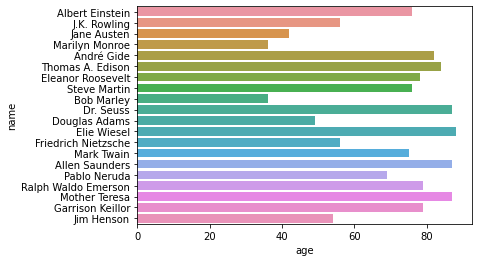

In [16]:
sns.barplot(x='age', y='name', data=unique_author.head(20))
plt.savefig('figure/author_age.png')

In [23]:
author = df.name.values

In [24]:
author_counter = Counter(author)

In [25]:
top10_author = pd.DataFrame(reversed(author_counter.most_common(10)), columns=['author', 'total quotes'])
top10_author.head(10)

,author,total quotes
0,Ralph Waldo Emerson,2
1,Eleanor Roosevelt,2
2,Bob Marley,3
3,C.S. Lewis,5
4,Jane Austen,5
5,Mark Twain,6
6,Dr. Seuss,6
7,Marilyn Monroe,7
8,J.K. Rowling,9
9,Albert Einstein,10


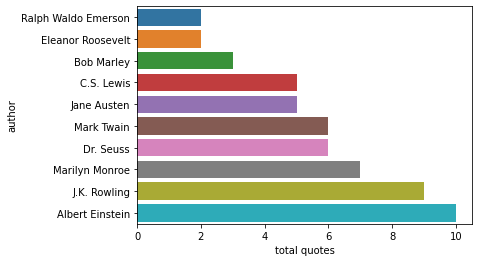

In [26]:
sns.barplot(x='total quotes', y='author', data=top10_author)
plt.savefig('figure/author_quotes.png')

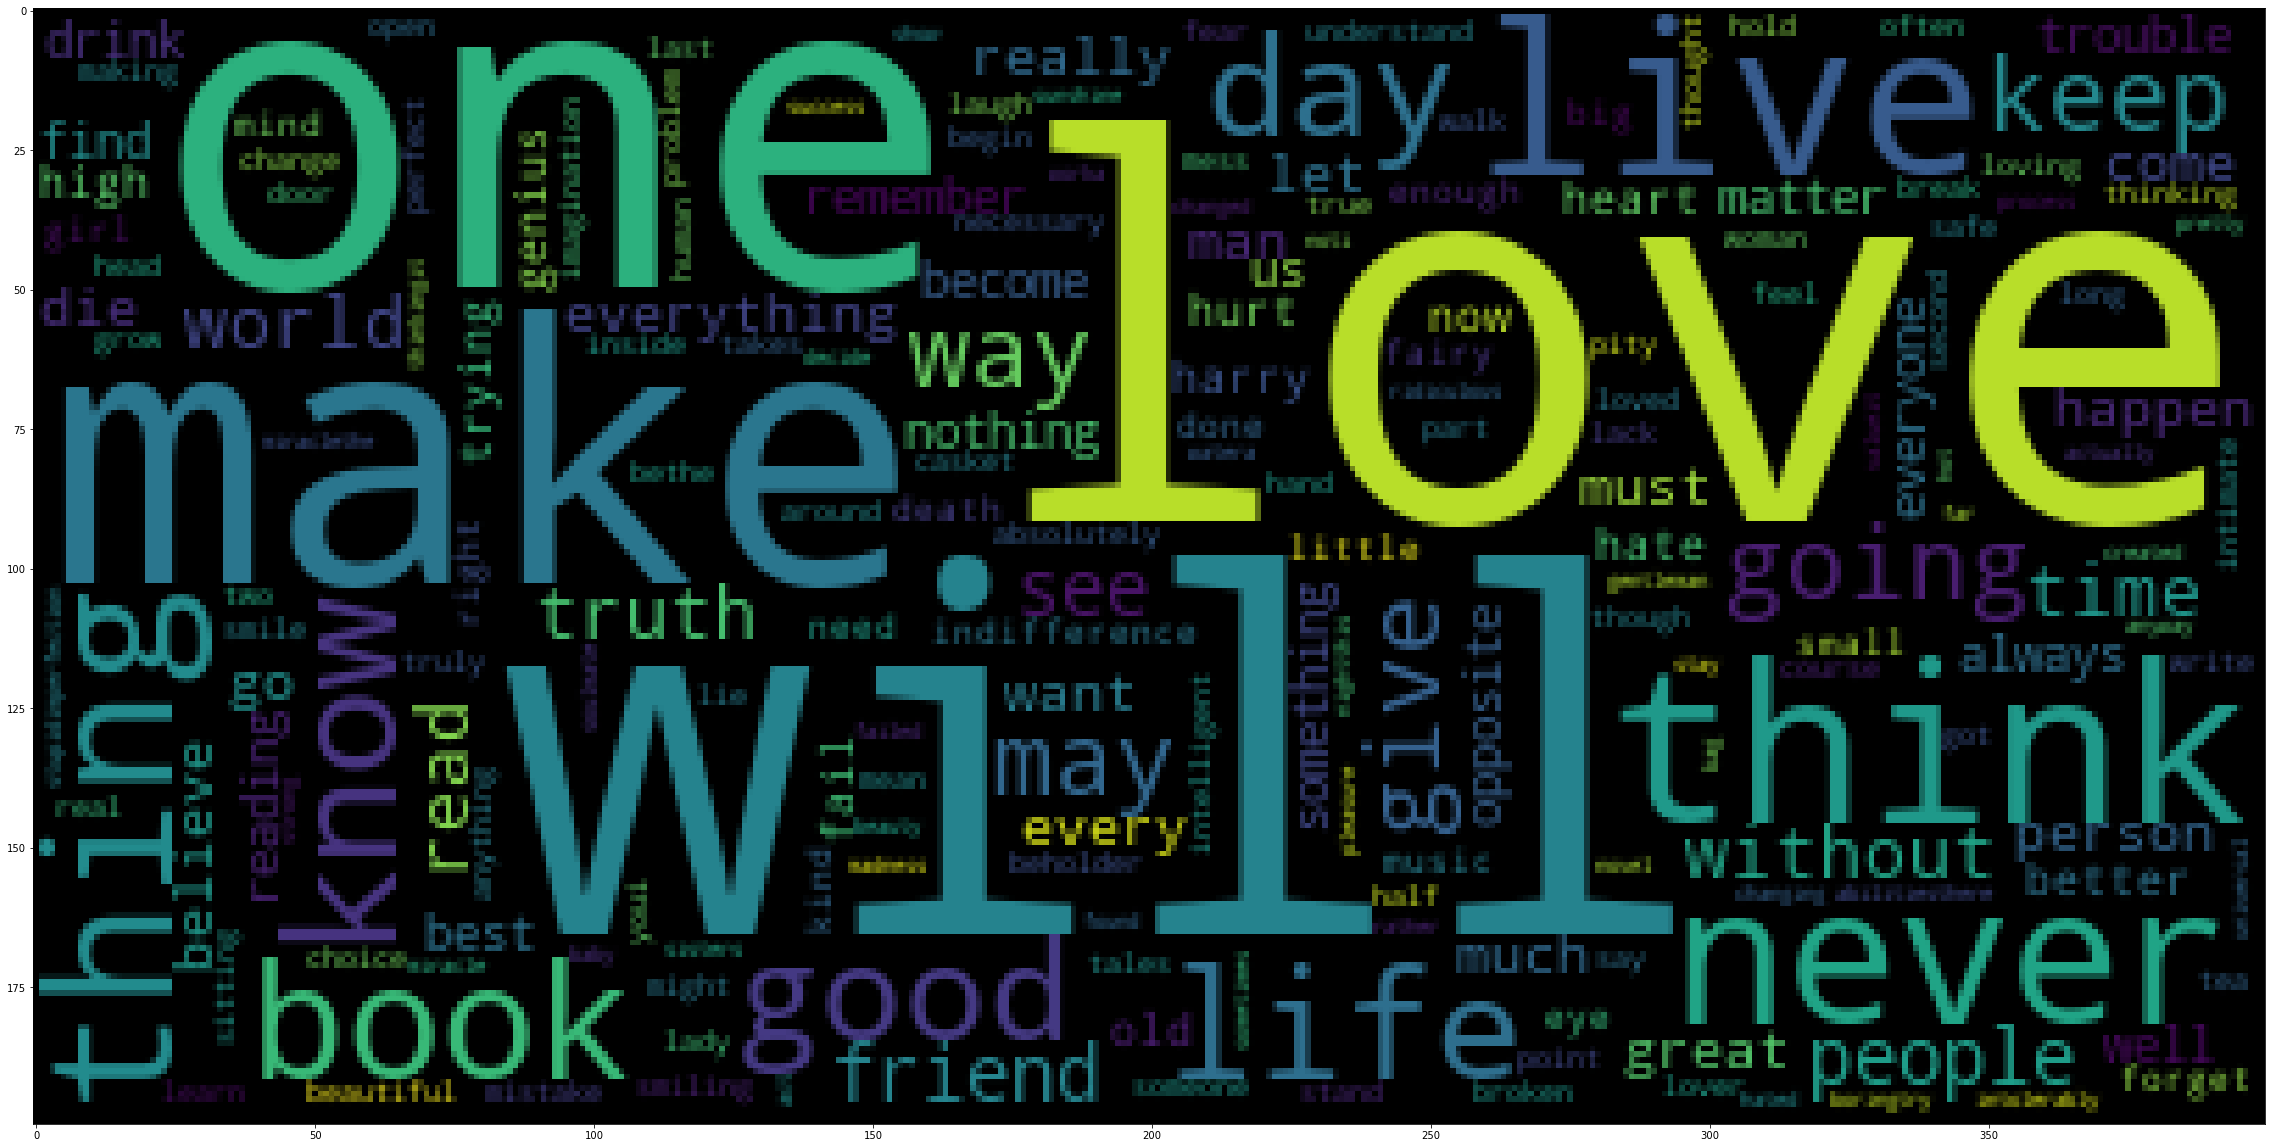

In [14]:
quotes = df.quote.apply(lambda x:x.translate(str.maketrans('', '', '.,')).lower()).values
tokens_list = reduce(lambda z, y :z + y, quotes)
wc = WordCloud()
wc.generate(tokens_list)
plt.figure(figsize=(40, 40))
plt.imshow(wc)
plt.savefig('figure/word_cloud.png')

In [27]:
max_idx = np.argmax(df.length.values)
min_idx = np.argmin(df.length.values)
print(f'The longest quote is: {df.length.values.max()} tokens \n{df.quote.values[max_idx]}')
print(f'The shortest quote is: {df.length.values.min()} tokens \n{df.quote.values[min_idx]}')
print("Average length is: ", df.length.values.mean())


The longest quote is: 201 tokens 
This life is what you make it. No matter what, you're going to mess up sometimes, it's a universal truth. But the good part is you get to decide how you're going to mess it up. Girls will be your friends - they'll act like it anyway. But just remember, some come, some go. The ones that stay with you through everything - they're your true best friends. Don't let go of them. Also remember, sisters make the best friends in the world. As for lovers, well, they'll come and go too. And baby, I hate to say it, most of them - actually pretty much all of them are going to break your heart, but you can't give up because if you give up, you'll never find your soulmate. You'll never find that half who makes you whole and that goes for everything. Just because you fail once, doesn't mean you're gonna fail at everything. Keep trying, hold on, and always, always, always believe in yourself, because if you don't, then who will, sweetie? So keep your head high, keep yo